# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [3]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Compute predictions
            y_pred = self.predict(X)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))

            if self.penalty is None:
                db = (1 / n_samples) * np.sum(y_pred - y)
            elif self.penalty == 'L1':
                dw += (self.alpha / n_samples) * np.sign(self.weights)
                db = (1 / n_samples) * np.sum(y_pred - y)
            elif self.penalty == 'L2':
                dw += (2 * self.alpha / n_samples) * self.weights
                db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


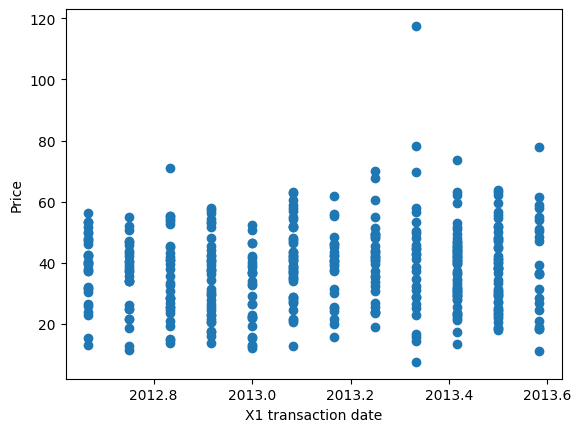

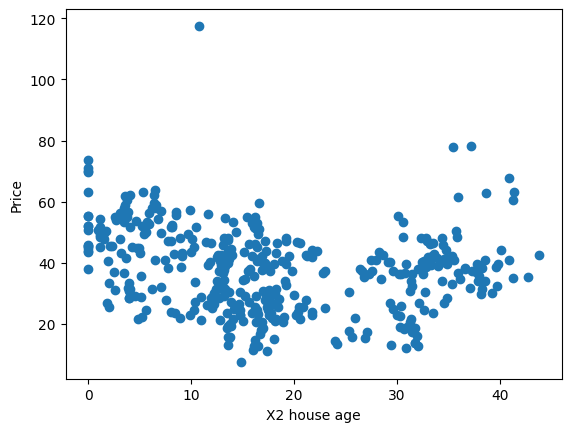

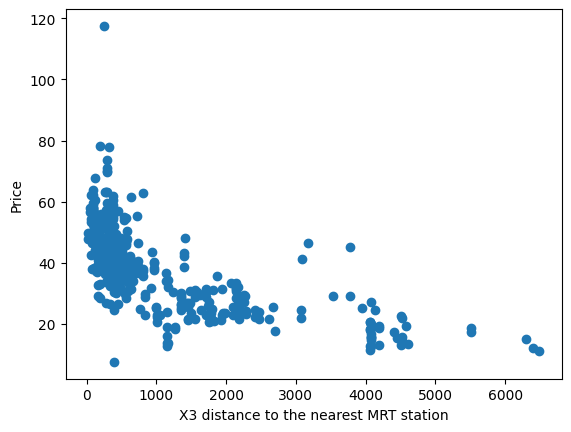

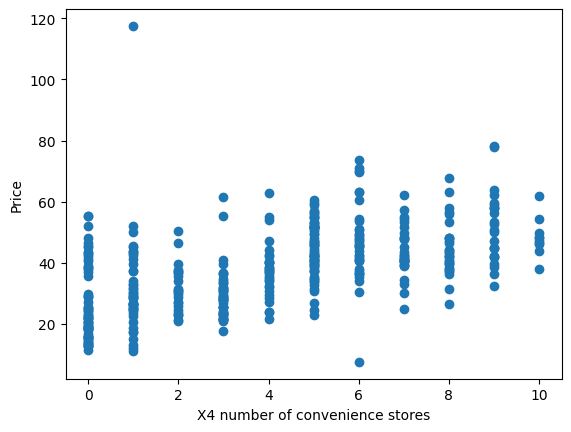

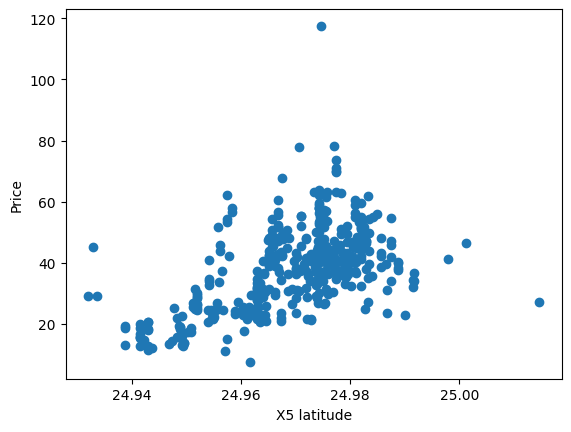

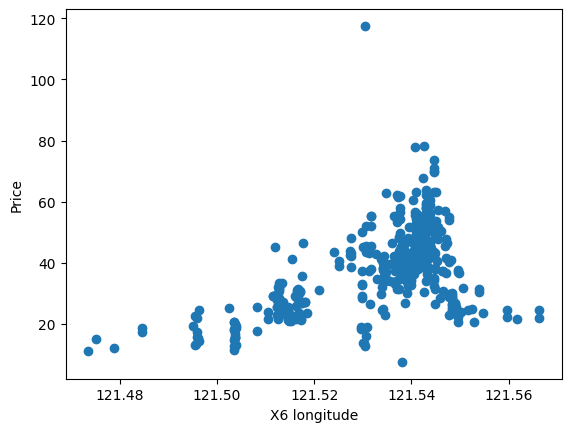

Custom Models:
Linear Regression - MSE: 66.6734, R2: 0.5797
Lasso Regression - MSE: 65.7128, R2: 0.5857
Ridge Regression - MSE: 66.4374, R2: 0.5811

Sklearn Models:
Linear Regression - MSE: 66.6734, R2: 0.5797
Lasso Regression - MSE: 103.3429, R2: 0.3485
Ridge Regression - MSE: 65.4130, R2: 0.5876


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Read the dataset using pandas
data = pd.read_csv('Real estate.csv')

# Step 2: Check for null values
print(data.isnull().sum())

# Step 3: Plot column values against the last column (prices)
for column in data.columns[1:-1]:
    plt.scatter(data[column], data['Y house price of unit area'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

# Step 4: Remove unwanted columns
data = data.drop(['No'], axis=1)

# Step 5: Split the dataset into train and test data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 6: Normalize the X_train and X_test using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Fit the training data into the models created in question 1 and predict the testing data
# Custom Linear Regression
regressor_custom = LinearRegression()
regressor_custom.fit(X_train, y_train)
y_pred_custom = regressor_custom.predict(X_test)
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

# Custom Lasso Regression
regressor_lasso_custom = Lasso(alpha=0.1)
regressor_lasso_custom.fit(X_train, y_train)
y_pred_lasso_custom = regressor_lasso_custom.predict(X_test)
mse_lasso_custom = mean_squared_error(y_test, y_pred_lasso_custom)
r2_lasso_custom = r2_score(y_test, y_pred_lasso_custom)

# Custom Ridge Regression
regressor_ridge_custom = Ridge(alpha=0.1)
regressor_ridge_custom.fit(X_train, y_train)
y_pred_ridge_custom = regressor_ridge_custom.predict(X_test)
mse_ridge_custom = mean_squared_error(y_test, y_pred_ridge_custom)
r2_ridge_custom = r2_score(y_test, y_pred_ridge_custom)

# Step 8: Fit the training data into the sklearn models and evaluate the predictions
# Linear Regression
regressor_sklearn = LinearRegression()
regressor_sklearn.fit(X_train, y_train)
y_pred_sklearn = regressor_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

# Lasso Regression
regressor_lasso_sklearn = Lasso()
regressor_lasso_sklearn.fit(X_train, y_train)
y_pred_lasso_sklearn = regressor_lasso_sklearn.predict(X_test)
mse_lasso_sklearn = mean_squared_error(y_test, y_pred_lasso_sklearn)
r2_lasso_sklearn = r2_score(y_test, y_pred_lasso_sklearn)

# Ridge Regression
regressor_ridge_sklearn = Ridge()
regressor_ridge_sklearn.fit(X_train, y_train)
y_pred_ridge_sklearn = regressor_ridge_sklearn.predict(X_test)
mse_ridge_sklearn = mean_squared_error(y_test, y_pred_ridge_sklearn)
r2_ridge_sklearn = r2_score(y_test, y_pred_ridge_sklearn)

# Step 9: Print evaluation metrics
print("Custom Models:")
print("Linear Regression - MSE: {:.4f}, R2: {:.4f}".format(mse_custom, r2_custom))
print("Lasso Regression - MSE: {:.4f}, R2: {:.4f}".format(mse_lasso_custom, r2_lasso_custom))
print("Ridge Regression - MSE: {:.4f}, R2: {:.4f}".format(mse_ridge_custom, r2_ridge_custom))

print("\nSklearn Models:")
print("Linear Regression - MSE: {:.4f}, R2: {:.4f}".format(mse_sklearn, r2_sklearn))
print("Lasso Regression - MSE: {:.4f}, R2: {:.4f}".format(mse_lasso_sklearn, r2_lasso_sklearn))
print("Ridge Regression - MSE: {:.4f}, R2: {:.4f}".format(mse_ridge_sklearn, r2_ridge_sklearn))


# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [7]:
import numpy as np

def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class logisticregression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_output)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X): 
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_output)
        return np.round(y_pred)

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [8]:
# Fit and evaluate the custom logistic regression model
custom_model = logisticregression(learning_rate=0.1, epochs=1000)
custom_model.fit(X_train, y_train)
custom_predictions = custom_model.predict(X_test)
custom_accuracy = accuracy_score(y_test, custom_predictions)
print("Custom Logistic Regression Accuracy: {:.2f}%".format(custom_accuracy * 100))

# Fit and evaluate the scikit-learn logistic regression model with different penalties
penalties = ['l1','l2','none']
for penalty in penalties:
    sklearn_model = LogisticRegression(penalty=penalty, solver='saga')
    sklearn_model.fit(X_train, y_train)
    sklearn_predictions = sklearn_model.predict(X_test)
    sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
    print("Scikit-learn Logistic Regression Accuracy (Penalty: {}): {:.2f}%".format(penalty, sklearn_accuracy * 100))


Custom Logistic Regression Accuracy: 98.25%
Scikit-learn Logistic Regression Accuracy (Penalty: l1): 97.37%
Scikit-learn Logistic Regression Accuracy (Penalty: l2): 99.12%
Scikit-learn Logistic Regression Accuracy (Penalty: none): 99.12%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Classification Report (Scikit-learn Model):\n", classification_report(y_test, sklearn_predictions))
print("Confusion Matrix (Scikit-learn Model):\n", confusion_matrix(y_test, sklearn_predictions))

Classification Report (Scikit-learn Model):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix (Scikit-learn Model):
 [[42  1]
 [ 0 71]]


# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
df = pd.read_csv('glass.csv')

# Separate features (X) and labels (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [12]:
# Create and fit the custom KNN model
import numpy as np
from collections import Counter
# Counter class is imported from the collections module. It is used later
# to count occurrences of labels in the nearest neighbors.

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

clf=KNN(k=4)
clf.fit(X_train,y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [13]:
# Make predictions using the custom KNN model
predictions=clf.predict(X_test)


# Calculate accuracy using accuracy_score for the custom KNN model
accuracy_custom = accuracy(predictions,y_test)

# Create and fit the scikit-learn KNN model
knn_sklearn = KNeighborsClassifier(n_neighbors=4)
knn_sklearn.fit(X_train, y_train)

# Make predictions using the scikit-learn KNN model
y_pred_sklearn = knn_sklearn.predict(X_test)

# Calculate accuracy using accuracy_score for the scikit-learn KNN model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Print the accuracy scores for comparison
print("Custom KNN Model Accuracy: {:.2f}%".format(accuracy_custom * 100))
print("Scikit-learn KNN Model Accuracy: {:.2f}%".format(accuracy_sklearn * 100))

Custom KNN Model Accuracy: 79.07%
Scikit-learn KNN Model Accuracy: 69.77%


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

Decision Tree Classifier Accuracy: 83.72%


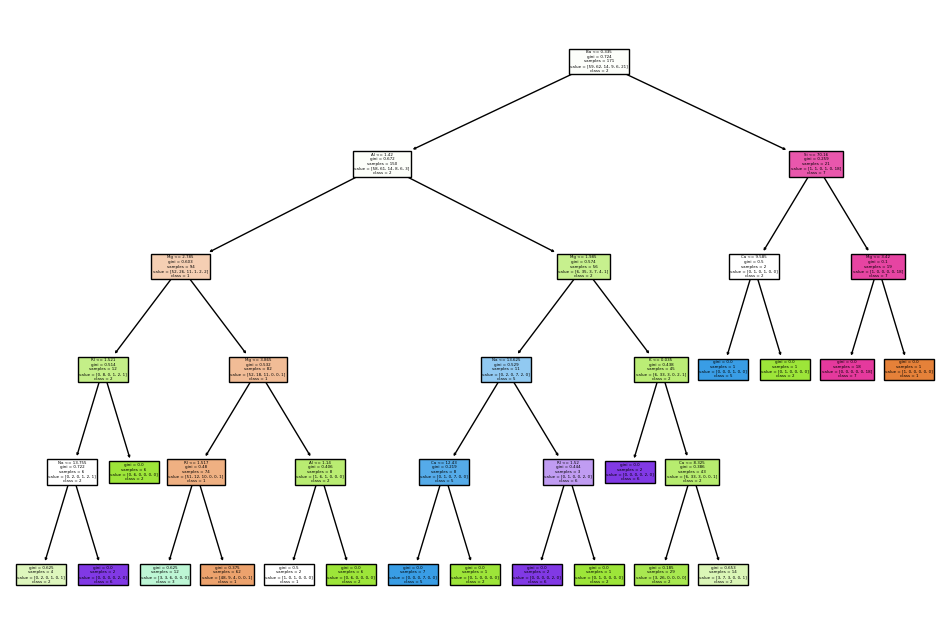

In [14]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Create and fit the Decision Tree Classifier
max_depth = 5  # Set the maximum depth for the decision tree
dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
dt_classifier.fit(X_train, y_train)

# Make predictions using the Decision Tree Classifier
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy using accuracy_score for the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy score for the Decision Tree Classifier
print("Decision Tree Classifier Accuracy: {:.2f}%".format(accuracy_dt * 100))

# Plot the decision tree
fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(dt_classifier, feature_names=df.columns[:-1], class_names=[str(c) for c in df['Type'].unique()], filled=True)
plt.show()